In [1]:
import os
import numpy as np

from tensorflow.python.keras import backend as K
from tensorflow.python.keras.datasets.cifar import load_batch
from tensorflow.python.keras.utils.data_utils import get_file
from tensorflow.python.util.tf_export import keras_export

def load_data():
  """Loads CIFAR10 dataset.

  Returns:
      Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
  """
  dirname = 'cifar-10-batches-py'
  origin = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
  path = 'datasets/pankrzysiu-cifar10-python-momodel/' + dirname

  num_train_samples = 50000

  x_train = np.empty((num_train_samples, 3, 32, 32), dtype='uint8')
  y_train = np.empty((num_train_samples,), dtype='uint8')

  for i in range(1, 6):
    fpath = os.path.join(path, 'data_batch_' + str(i))
    (x_train[(i - 1) * 10000:i * 10000, :, :, :],
     y_train[(i - 1) * 10000:i * 10000]) = load_batch(fpath)

  fpath = os.path.join(path, 'test_batch')
  x_test, y_test = load_batch(fpath)

  y_train = np.reshape(y_train, (len(y_train), 1))
  y_test = np.reshape(y_test, (len(y_test), 1))

  if K.image_data_format() == 'channels_last':
    x_train = x_train.transpose(0, 2, 3, 1)
    x_test = x_test.transpose(0, 2, 3, 1)

  x_test = x_test.astype(x_train.dtype)
  y_test = y_test.astype(y_train.dtype)

  return (x_train, y_train), (x_test, y_test)

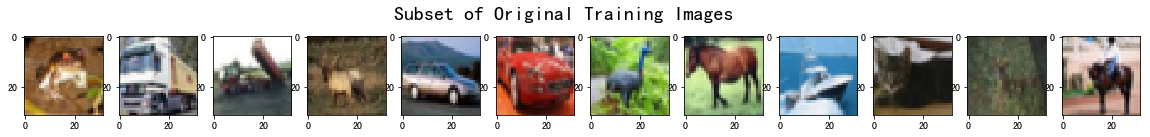

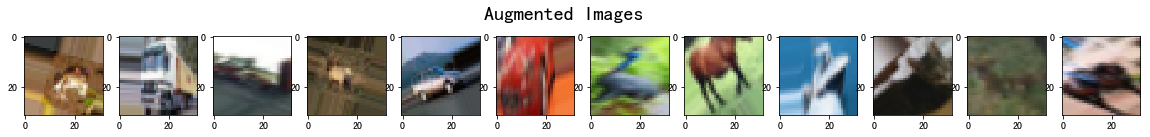

In [23]:
# 显示原始图像和增强后的图像
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = load_data()
#x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
#x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

image_gen_train = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.5
)
image_gen_train.fit(x_train)

#x_train_subset1 = np.squeeze(x_train[:12])
x_train_subset1 = x_train[:12]
x_train_subset2 = x_train[:12]  # 一次显示12张图片

fig = plt.figure(figsize=(20, 2))
plt.set_cmap('gray')
# 显示原始图片
for i in range(0, len(x_train_subset1)):
    ax = fig.add_subplot(1, 12, i + 1)
    ax.imshow(x_train_subset1[i])
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

# 显示增强后的图片
fig = plt.figure(figsize=(20, 2))
for x_batch in image_gen_train.flow(x_train_subset2, batch_size=12, shuffle=False):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i + 1)
        ax.imshow(x_batch[i])
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;
